In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [3]:
df = pd.read_csv("sap_storing_data_hu_project.csv")

C:\Users\cc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,11,19,21,24,25,27,32,33,36,37,38,39,40,46,47,48,49,51,53,55,56,60,73,75,78,80,82,83,86,87,91,95,99,102,103,104,107,108,109,110,111,112,113,116,118,119,120,121,122,123,124,129) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


We hebben de categoriale features en numerieke features gesplits in 2 dataframes. dit doen we zodat het makkelijker is om vergelijkingen te maken

In [6]:
numeriek = df.select_dtypes(include=np.number)
categoriaal_df = df.select_dtypes(include=["object"])

We hebben uiteindelijk alle hoge en lage outliers van het numerieke dataframe uitgehaalt

## Outliers eruit

In [9]:
def remove_outliers(df):
    for item in df:
        quantile_1 = df[item].quantile(0.25)
        quantile_3 = df[item].quantile(0.75)
        iqr = quantile_3 - quantile_1

        outlier_lower_value = quantile_1 - 3*iqr
        outlier_high_value = quantile_3 + 3*iqr

        df = df[(df[item] > outlier_lower_value) & (df[item]<outlier_high_value)]
        return df

In [10]:
numeriek_df = remove_outliers(numeriek)

We hebben ook de NA's uitgehaald van het numerieke dataframe en het categoriale dataframe.

## NA'S eruit

In [11]:
numeriek_df = numeriek_df.dropna()
categoriaal_df = categoriaal_df.dropna()

## Interesante Categoriale Features

## Interesante Numerieke Features

In [15]:
prioriteit_feature = numeriek_df["stm_prioriteit"]
functieherstel = numeriek_df["stm_fh_duur"]
oorzaakcode_feature = numeriek_df["stm_oorz_code"]

### Feature variable - prioriteit

We zagen dat een prioriteit van 1 altijd de functie herstel heeft van 0 wat we uit kunnen gaan het het makkelijk op te lossen was.

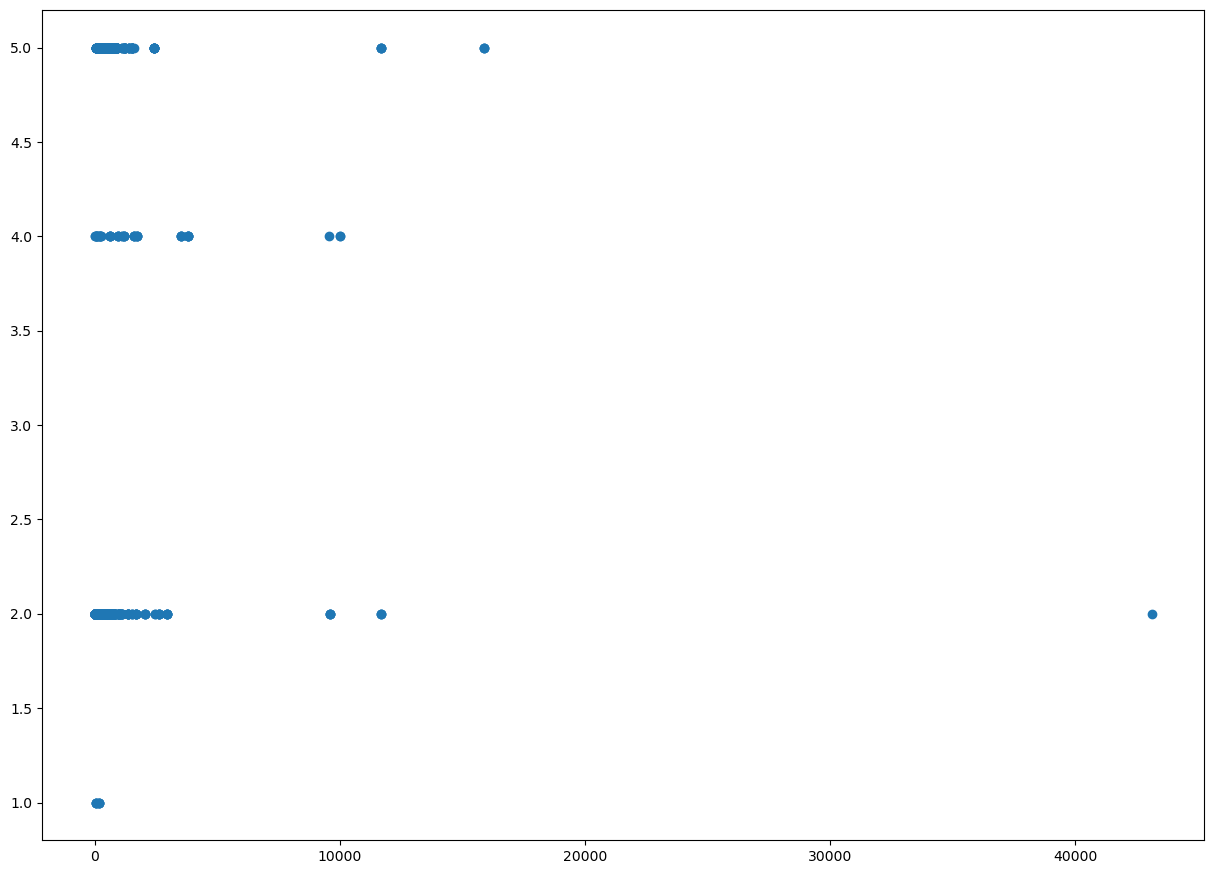

In [23]:
plt.figure(figsize=(15,11), dpi=100)
plt.scatter(functieherstel, prioriteit_feature, label="Scatter Plot")

### Feature variable - oorzaakcode

We konden vooral niet zien of er een trend was binnen het data waarom somige oorzaak codes een langere functie herstel hadden dan andere. Daarom gaan we proberen of we bepaalde oorzaak codes kunnen groeperen zodat we meer algemener kunnen praten over een bepaald storing groep en daar een uitspraak kunnen maken over de functie herstel van die groep.


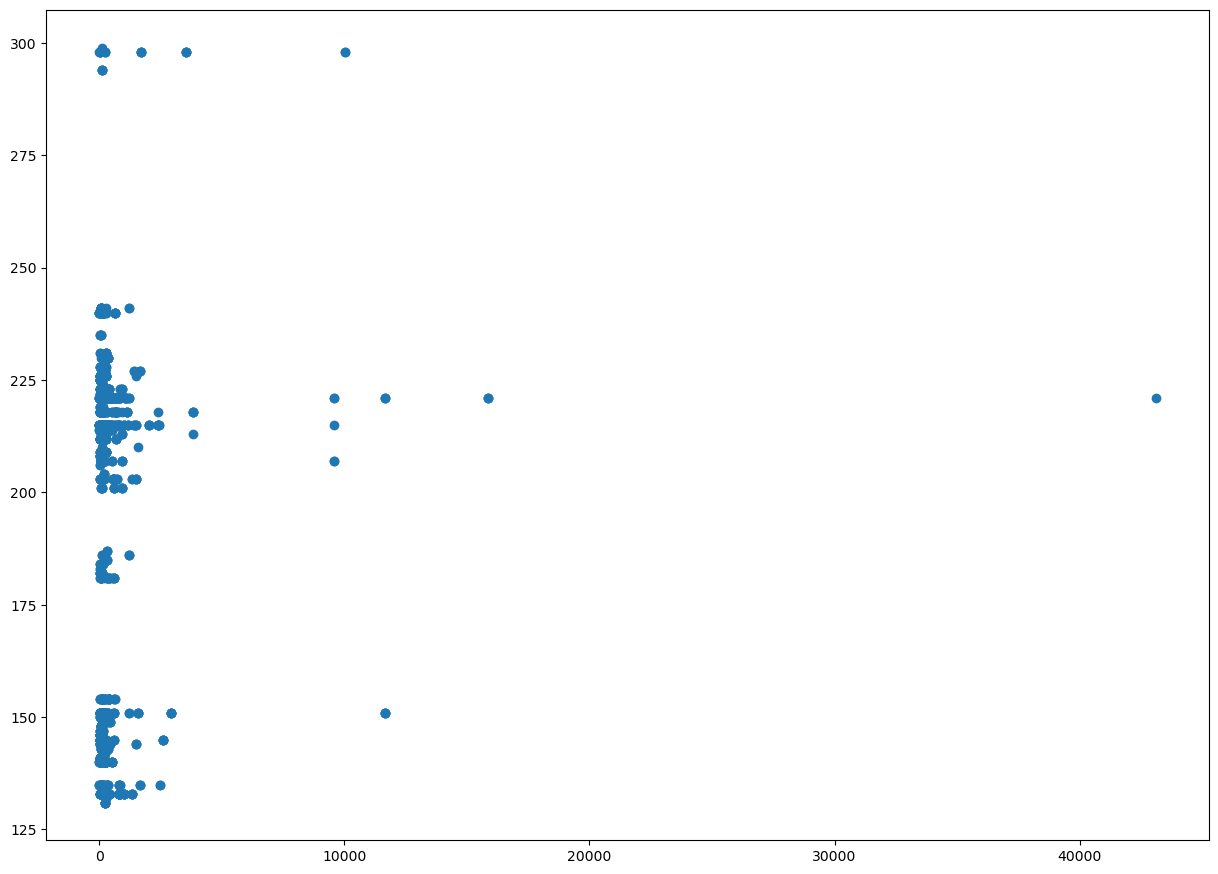

In [22]:
plt.figure(figsize=(15,11), dpi=100)
plt.scatter(functieherstel, oorzaakcode_feature, label="Scatter Plot")

We kunnen zien dat de oorzaak groep (TECHONV) de grootse frequentie heeft kwa oorzaak groep binnen het dataframe. We kunnen hier op verder kijken of dit oorzaak groep ook het grootse functieherstel tijd heeft dan andere oorzaakgroepen.

In [18]:
oorzaak_groep = pd.DataFrame(df, columns=["stm_oorz_code", "stm_oorz_groep", "stm_fh_duur"])

<AxesSubplot:>

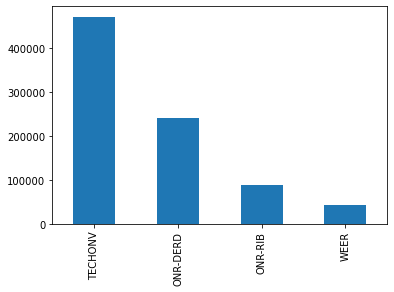

In [19]:
oorzaak_groep['stm_oorz_groep'].value_counts().plot(kind='bar')

In [20]:
TECHONV = oorzaak_groep[oorzaak_groep.stm_oorz_groep == 'TECHONV']
ONR_DERD = oorzaak_groep[oorzaak_groep.stm_oorz_groep == 'ONR-DERD']
ONR_RIB = oorzaak_groep[oorzaak_groep.stm_oorz_groep == 'ONR-RIB']
WEER = oorzaak_groep[oorzaak_groep.stm_oorz_groep == 'WEER']

We kunnen hier onder in de plot zien dat de oorzaak groep (TECHONV) veel meer data punten heeft bij een hogere functie herstel wat wilt zeggen dat algemeen binnen dat groep een oorzaak code een langere functie herstel heeft dan andere oorzaak codes binnen groepen

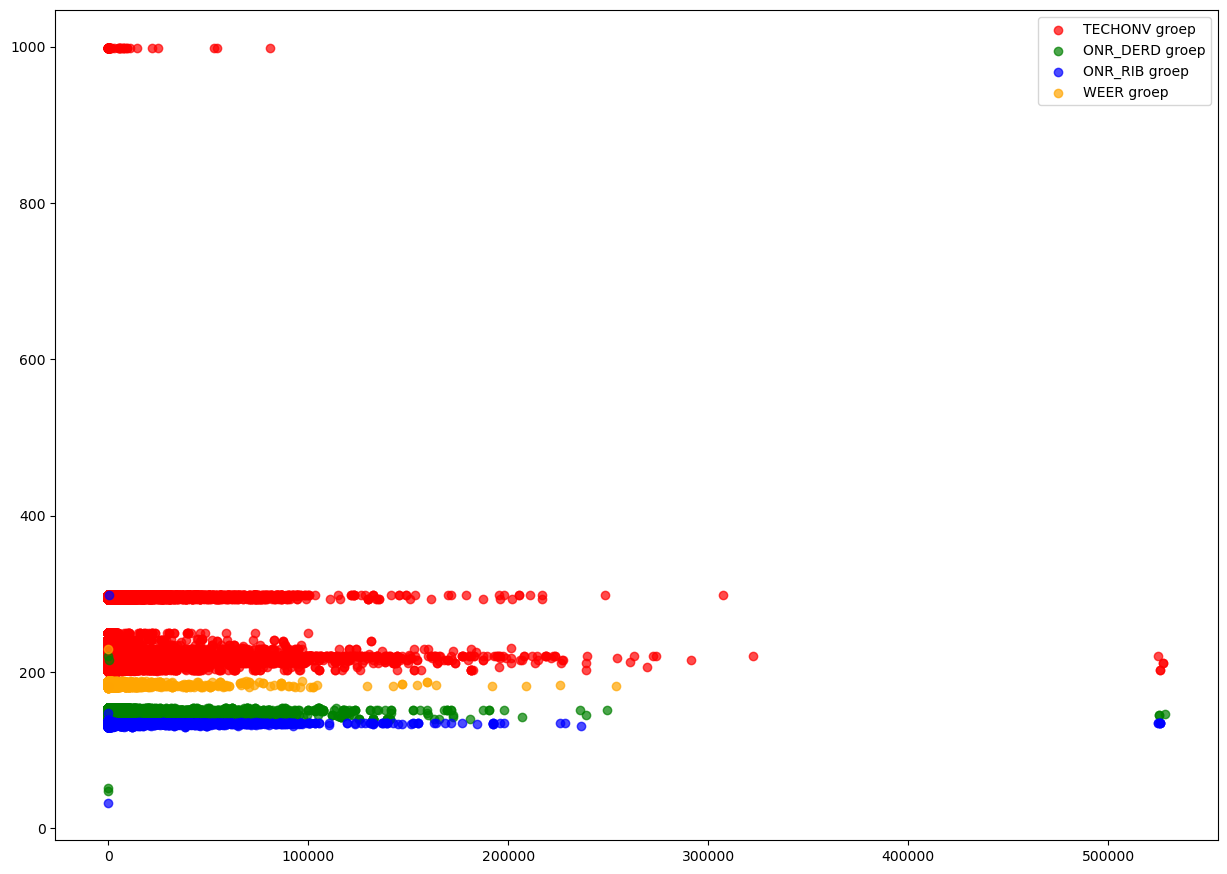

In [21]:
plt.figure(figsize=(15,11), dpi=100)
plt.scatter(TECHONV["stm_fh_duur"], TECHONV["stm_oorz_code"], label="TECHONV groep", color="r", alpha=.7)
plt.scatter(ONR_DERD["stm_fh_duur"], ONR_DERD["stm_oorz_code"], label="ONR_DERD groep", color="g", alpha=.7)
plt.scatter(ONR_RIB["stm_fh_duur"], ONR_RIB["stm_oorz_code"], label="ONR_RIB groep", color="b", alpha=.7)
plt.scatter(WEER["stm_fh_duur"], WEER["stm_oorz_code"], label="WEER groep", color="orange", alpha=.7)
plt.legend()

### Conclusie - oorzaakcode

We kunnen concluderen dat de feature variable oorzaakcode wel een goed feature is aangezien het veel over het functie hersteltijd zegt dan alle andere kolommen. We kunnen dit voornamelijk zien in de plots die we hebben gemaakt die wat over een oorzaak groep en de betreffende functieherstel tijd die er aan vast staat.